# Exploratory Data Analysis

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

# Dataframes loading

In [2]:
#get folder path
folder_path = os.path.dirname(os.path.dirname(os.path.realpath("EDA.ipynb")))

#get small data path
small_neg_path = os.path.join(folder_path, "twitter-datasets", "train_neg.txt")
small_pos_path = os.path.join(folder_path, "twitter-datasets", "train_pos.txt")
test_path = os.path.join(folder_path, "twitter-datasets", "test_data.txt")

#create small data dataframe
with open(small_neg_path, 'r') as file:
    lines_neg = file.readlines()
with open(small_pos_path, 'r') as file:
    lines_pos = file.readlines()
with open(test_path, 'r') as file:
    lines_test = file.readlines()

small_neg_df = pd.DataFrame({'Tweets': lines_neg, 'Sentiment': -1})
small_pos_df = pd.DataFrame({'Tweets': lines_pos, 'Sentiment': 1})
test_df= pd.DataFrame({'Tweets': lines_test})

# Preprocessing

### bag of words creation

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# Assuming your original dataframe is named 'original_df' and contains a 'Tweets' column
# You may need to adjust column names based on your actual dataframe structure

# Combine positive and negative dataframes
combined_df = pd.concat([small_neg_df, small_pos_df], ignore_index=True)

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=4000)  # You can adjust max_features as needed

# Fit and transform the combined data
bow_matrix = count_vectorizer.fit_transform(combined_df['Tweets'])

# Convert the BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Add the 'Sentiment' column back to the BoW DataFrame
bow_df['Sentiment'] = combined_df['Sentiment']

# Display the resulting BoW DataFrame
bow_df


,00,000,01,02,04,05,06,07,08,10,...,yur,zac,zayn,zealand,zinc,zip,zone,zoo,zoom,Sentiment
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Words histogram

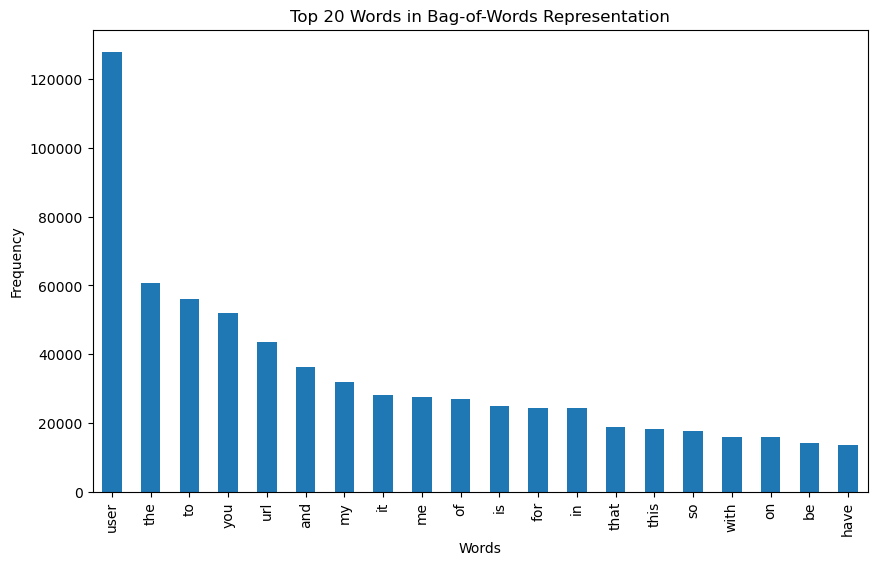

In [4]:
# Sum the occurrences of each word across all tweets
word_counts = bow_df.drop(columns=['Sentiment']).sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
word_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Words in Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### creating the tf-idf matrix from the bag of words matrix

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

if "user" in bow_df.columns:
    bow_df.drop(columns=['user'], inplace=True)

# Extract the BoW matrix and 'Sentiment' column from bow_df
X_bow = bow_df.drop(columns=['Sentiment'])
y_bow = bow_df['Sentiment']

# Initialize the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)


# Fit and transform the BoW matrix to obtain the TF-IDF matrix
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_transformer.transform(X_test)

X_pred= tfidf_transformer.transform(test_df['Tweets'])

MemoryError: Unable to allocate 4.77 GiB for an array with shape (160000, 3999) and data type float64

### directly creating the tf-idf matrix from raw data

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Combine your positive and negative dataframes
X=combined_df['Tweets']
y=combined_df['Sentiment']

# Assuming 'Tweets' contains the tweet text and 'Sentiment' contains the sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_pred= tfidf_vectorizer.transform(test_df['Tweets'])

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertModel
import torch

# Assuming combined_df and test_df are already loaded

# Tokenize the tweets using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_tweets(tweets):
    return tokenizer(tweets, padding=True, truncation=True, return_tensors='pt')

# Tokenize the training data
tokenized_data = tokenize_tweets(combined_df['Tweets'].explode().tolist())

# Add Sentiment labels to tokenized_data
tokenized_data['labels'] = combined_df['Sentiment'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tokenized_data.input_ids, tokenized_data.labels, test_size=0.2, random_state=42)

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Extract BERT embeddings for training data
with torch.no_grad():
    train_outputs = model(input_ids=X_train)

# Use the embeddings as features for logistic regression
X_train_features = train_outputs.last_hidden_state.mean(dim=1).numpy()

# Train logistic regression model
regression_model = LogisticRegression()
regression_model.fit(X_train_features, y_train)

# Predict on test data
with torch.no_grad():
    test_outputs = model(input_ids=X_test)

X_test_features = test_outputs.last_hidden_state.mean(dim=1).numpy()
y_test_pred = regression_model.predict(X_test_features)

# Print accuracy on test data
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test data: {accuracy}")

# Now, let's use the model to predict on the test_df
tokenized_test_data = tokenize_tweets(test_df['Tweets'].explode().tolist())

with torch.no_grad():
    test_outputs = model(input_ids=tokenized_test_data.input_ids)

X_pred_features = test_outputs.last_hidden_state.mean(dim=1).numpy()
y_pred = regression_model.predict(X_pred_features)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RuntimeError: [enforce fail at alloc_cpu.cpp:80] data. DefaultCPUAllocator: not enough memory: you tried to allocate 50626560000 bytes.

# Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the TF-IDF transformed training data
logreg_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the testing data
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.78      0.80     19993
           1       0.79      0.83      0.81     20007

    accuracy                           0.81     40000
   macro avg       0.81      0.81      0.81     40000
weighted avg       0.81      0.81      0.81     40000



c:\Users\mehdi\anaconda3\envs\ada\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### accuracy : 0.801

# Regularized logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the regularized Logistic Regression model (L2 regularization by default)
regularized_logreg_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)

# Train the model on the TF-IDF transformed training data
regularized_logreg_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the testing data
y_pred_regularized_logreg = regularized_logreg_model.predict(X_test_tfidf)

# Evaluate the regularized model
accuracy_regularized_logreg = accuracy_score(y_test, y_pred_regularized_logreg)
print(f"Regularized Logistic Regression Accuracy: {accuracy_regularized_logreg:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_regularized_logreg))


Regularized Logistic Regression Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.78      0.80     19993
           1       0.79      0.83      0.81     20007

    accuracy                           0.81     40000
   macro avg       0.81      0.81      0.81     40000
weighted avg       0.81      0.81      0.81     40000



c:\Users\mehdi\anaconda3\envs\ada\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Gradient boosting

In [ ]:
from xgboost import XGBClassifier

# Convert -1 to 0 in sentiment labels
y_train_binary = y_train.map({-1: 0, 1: 1})
y_test_binary = y_test.map({-1: 0, 1: 1})

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the TF-IDF transformed training data
xgb_model.fit(X_train_tfidf, y_train_binary)

# Predict sentiment on the testing data
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_xgb))



c:\Users\mehdi\anaconda3\envs\ada\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBoost Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77     19993
           1       0.75      0.88      0.81     20007

    accuracy                           0.79     40000
   macro avg       0.80      0.79      0.79     40000
weighted avg       0.80      0.79      0.79     40000



# SVM


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the TF-IDF transformed training data
svm_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the testing data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model on the TF-IDF transformed training data
rf_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the testing data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.78      0.78     19993
           1       0.78      0.78      0.78     20007

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000



### accuracy : 0.760

# create submission

In [ ]:
def create_csv_submission(ids, y_pred, name):
    """
    This function creates a csv file named 'name' in the format required for a submission in Kaggle or AIcrowd.
    The file will contain two columns the first with 'ids' and the second with 'y_pred'.
    y_pred must be a list or np.array of 1 and -1 otherwise the function will raise a ValueError.

    Args:
        ids (list,np.array): indices
        y_pred (list,np.array): predictions on data correspondent to indices
        name (str): name of the file to be created
    """
    # Check that y_pred only contains -1 and 1
    if not all(i in [-1, 1] for i in y_pred):
        raise ValueError("y_pred can only contain values -1, 1")

    with open(name, "w", newline="") as csvfile:
        fieldnames = ["Id", "Prediction"]
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({"Id": int(r1), "Prediction": int(r2)})

#!!!!don't forget to change the name of the model!!!!
ids=np.arange(1,len(y_pred)+1)
y_subm=logreg_model.predict(X_pred)
create_csv_submission(ids, y_subm, "submission.csv")